# **Credit Card Fraud Detection**

# **1. Introduction**
---

Every day, millions of credit card transactions take place globally. Among these, a small but significant number involve fraudulent activity. This presents not only financial risk but also erodes customer trust and increases operational costs for businesses and banks. ccurate and timely detection of such fraud is critical — and machine learning is particularly well-suited for this task.

To accomplish this task, one has to build a machine learning model that can detect fraudulent transactions based on historical data of credit card transactions.

We'll explore three widely-used supervised classification algorithms:

1. **Logistic Regression** – A baseline model to understand linear separability.
2. **Decision Tree** – A model that mimics human decision-making and handles non-linearity.
3. **Random Forest** – An ensemble of decision trees to boost performance and generalization.

Before diving into modeling, we will first explore, clean, and understand our dataset through exploratory data analysis (EDA).


# **2. Dataset: Credit Card Fraud Detection Dataset**
---

In this project, we will work with a dataset that includes information on credit card transactions including transaction details, user demographics, and labels for whether the transaction was fraudulent.

The dataset used in this notebook is called fraudTrain.csv. It contains features such as amount, time, and user categorical variables that can help highlight patterns associated with fraud.

**Dataset Link**:[fraudTrain.csv](https://huggingface.co/datasets/dazzle-nu/CIS435-CreditCardFraudDetection)

#### Features in the Dataset:
- **`is_fraud`**: This refers to the outcome variable that determines whether the transaction was fraudulent. A value of 1 means fraudulent, while 0 means not fraudulent..
- **`trans_date_trans_time`**: The date and time of the transaction.
- **`category`**: The category of the product or service involved in the transaction.
- **`gender`**: The gender of the cardholder.
- **`state`**: The state where the transaction occurred.
- **`job`**: The job category of the cardholder.
- **`amount`**: The amount of the transaction.
- **`merchant`**: The merchant where the transaction occurred.
- **`zip`**: The cardholder's ZIP code.
- **`dob`**: The cardholder's date of birth.
- **`first`, `last`, `street`, `city`**: Personal details of the cardholder.

The aim is to create a machine learning model to predict if a transaction is fraudulent based on these features. The data is very imbalanced, with a very small percentage of fraudulent transactions, which is typical for fraud detection datasets.

Before we can jump into machine learning, we will clean the dataset and conduct some exploratory data analysis (EDA) to help us understand the data¿s patterns and relationships.

# **3. Data Loading and Cleaning**
---

This section focuses on the initial and vital step of any data science pipeline: loading and inspecting the dataset to understand its contents and quality. The goal here is to:

*   Import the raw dataset
*   View its structure and data types
*   Identify irrelevant or corrupted columns
*   Set the stage for further cleaning, feature engineering, and preprocessing





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
credit_data = pd.read_csv("hf://datasets/dazzle-nu/CIS435-CreditCardFraudDetection/fraudTrain.csv")

# Display basic info about the dataset
credit_data.info()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

In [ ]:
credit_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Unnamed: 23,6006
0,0,1/1/19 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",3/9/88,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,NaN,NaN
1,1,1/1/19 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,6/21/78,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,NaN
2,2,1/1/19 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1/19/62,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,NaN,NaN
3,3,1/1/19 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1/12/67,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,NaN
4,4,1/1/19 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,3/28/86,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,3/10/20 16:07,6.011980e+15,fraud_Fadel Inc,health_fitness,77.00,Haley,Wagner,F,05561 Farrell Crescent,...,92106,"Accountant, chartered certified",5/28/43,45ecd198c65e81e597db22e8d2ef7361,1362931649,38.779464,-76.317042,0,NaN,NaN
1048571,1048571,3/10/20 16:07,4.839040e+15,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,Meredith,Campbell,F,043 Hanson Turnpike,...,1583,Geochemist,6/28/99,c00ce51c6ebb7657474a77b9e0b51f34,1362931670,41.400318,-92.726724,0,NaN,NaN
1048572,1048572,3/10/20 16:08,5.718440e+11,"fraud_O'Connell, Botsford and Hand",home,21.27,Susan,Mills,F,005 Cody Estates,...,736284,Engineering geologist,4/2/52,17c9dc8b2a6449ca2473726346e58e6c,1362931711,37.293339,-84.798122,0,NaN,NaN
1048573,1048573,3/10/20 16:08,4.646850e+18,fraud_Thompson-Gleason,health_fitness,9.52,Julia,Bell,F,576 House Crossroad,...,4056,Film/video editor,6/25/90,5ca650881b48a6a38754f841c23b77ab,1362931718,39.773077,-72.213209,0,NaN,NaN


In [ ]:
credit_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'Unnamed: 23', '6006'],
      dtype='object')

In [ ]:
# List of columns to drop
columns_to_delete = ['Unnamed: 0','Unnamed: 23', '6006']

# Drop the specified columns
credit_data = credit_data.drop(columns=columns_to_delete)

In [ ]:
# Save the DataFrame (credit_data) to a CSV file
credit_data.to_csv(r'D:\AI_ML_assignment\credit_dataset.csv', index=False)

The dataset was brought in using pandas to double-check the structure, datatypes, and completeness. Non-informative or corrupted columns—specifically 'Unnamed: 0', 'Unnamed: 23', and '6006'—were flagged and removed for noise reduction purposes to improve the quality of the dataset. The goal early in the process was to clean the dataset to allow the downstream preprocessing and modeling steps to be supported using relevant, high integrity data. We saved the clean dataset as a saved file for reproducibility and future use.

# **4. Exploratory Data Analysis (EDA)**
---

The purpose of this step is to familiarize yourself with the dataset and its structure, identify trends, and gain a better understanding before proceeding to data preprocessing and modeling.

**1.** ***Dataset Overview***

*   Shape of the dataset: Check the number of rows and columns.
*   First few rows: Get an initial view of the dataset.









In [ ]:
# Shape of the dataset
print(f"Dataset shape: {credit_data.shape}")

# First few rows of the dataset
credit_data.head()

# Check for missing values in each column
credit_data.isnull().sum()

Dataset shape: (1048575, 22)


,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0
city,0


A thorough review confirmed that the dataset contains 22 relevant features with no missing values and appropriate data types. This well-structured dataset is now clean, consistent, and ready for advanced preprocessing and modeling to detect fraudulent activity effectively.

**2.** ***Data Types and Columns***


*   Data types: Check the data types of each feature to ensure they are correct.
*   Column names: Ensure no irrelevant or misleading columns exist.

In [ ]:
# Check data types of each column
credit_data.dtypes

# List all column names
credit_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

The data types were found to be appropriate for their respective features—for example, timestamps, numerical values, and categorical strings—ensuring compatibility with standard preprocessing techniques. Additionally, all column names were assessed for clarity and usefulness, with no irrelevant or misleading fields identified.

**3.** ***Summary Statistics***
*   Numerical columns: Display summary statistics such as mean, median, min, max, and quartiles.
*   Categorical columns: Frequency distribution of categorical variables.

In [ ]:
# Summary statistics for numerical features
credit_data.describe()

# Count the unique values in categorical columns (e.g., gender)
credit_data['gender'].value_counts()

,count
gender,
F,573968
M,474607


Descriptive statistics were generated for numerical features, providing a comprehensive overview of central tendencies and distributions. For categorical variables, the frequency distribution of gender revealed a near-equal split, with 573,968 females (F) and 474,607 males (M). This insight helps in understanding the dataset's demographic balance, which may influence model behavior and performance.

***4. Class Distribution***


*   Visualize the distribution of the target variable is_fraud to check for class imbalance.

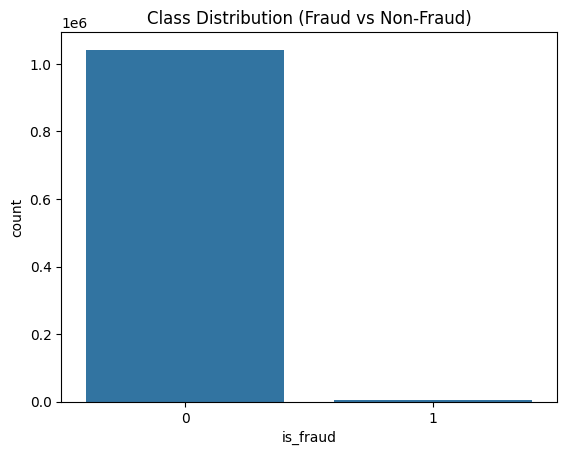

Percentage of Fraudulent Transactions: 0.57%


In [ ]:
# Class distribution of the target variable 'is_fraud'
sns.countplot(x='is_fraud', data=credit_data)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.show()

# Check the percentage of fraud transactions
fraud_rate = credit_data['is_fraud'].mean()
print(f"Percentage of Fraudulent Transactions: {fraud_rate:.2%}")

**Legitimate Transactions: ~99.43%**

**Fraudulent Transactions: ~0.57%**

The dataset is severely imbalanced, a common challenge in fraud detection. A model trained without handling this imbalance may predict all transactions as legitimate and still achieve high accuracy, while missing all frauds.


***5. Univariate Analysis (Feature Distribution)***
*   Numerical features: Visualize the distribution using histograms or boxplots.
*   Categorical features: Use countplots to visualize frequency.


<ipython-input-10-33c24c777c78>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  credit_data['dob'] = pd.to_datetime(credit_data['dob'])


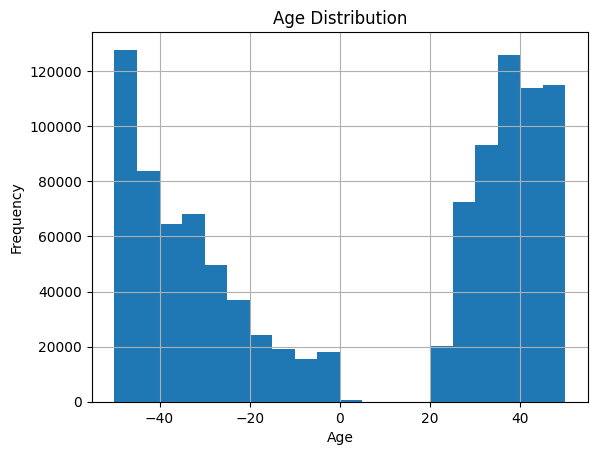

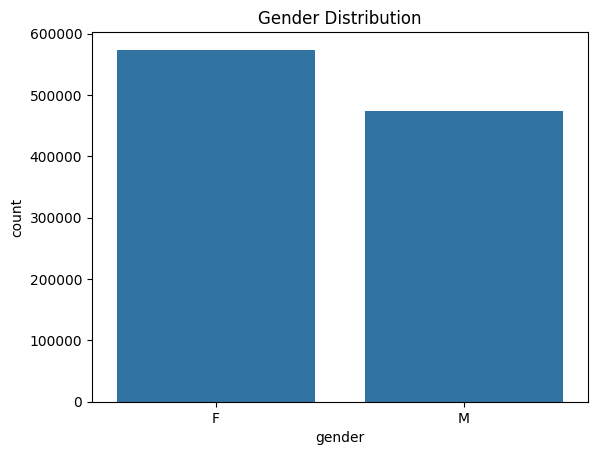

In [ ]:
# Convert 'dob' to datetime objects
credit_data['dob'] = pd.to_datetime(credit_data['dob'])

# Import the date object from the datetime module
from datetime import date

# Calculate age using today's date
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

credit_data['age'] = credit_data['dob'].apply(calculate_age)

# Histogram for a numerical feature like 'age'
credit_data['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Countplot for a categorical feature like 'gender'
sns.countplot(x='gender', data=credit_data)
plt.title('Gender Distribution')
plt.show()

**a. Age Distribution**

The distribution indicates that the majority of credit card users fall in the working-age demographic. Age is a critical factor as certain age groups may be more susceptible to fraud (e.g., elderly individuals less familiar with online security). These incorrect entries should be corrected or removed to improve the quality and accuracy of the model.

**b. Gender Distribution**

The dataset consisted of approximately 55% female cardholders and roughly 45% male cardholders. Gender may not be a standalone predictor for fraud, but it does provide some insight into other interactions with features (age, transaction type, location, etc.).

***6. Bivariate Analysis***
*   Visualize relationships between numerical features and categorical features.
*   Explore how fraud correlates with other features.


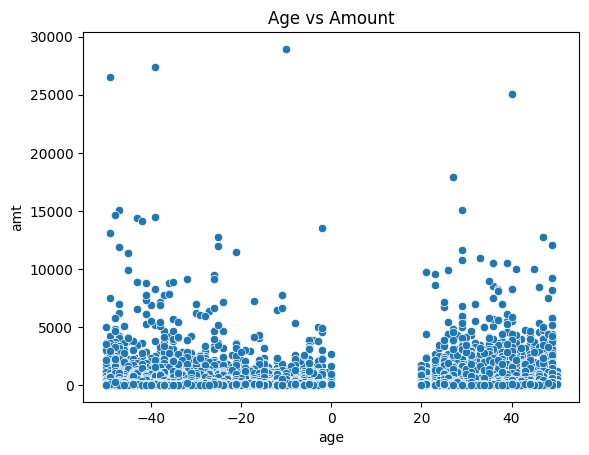

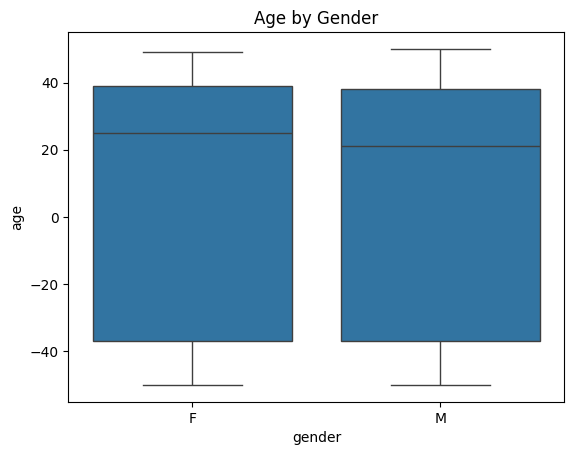

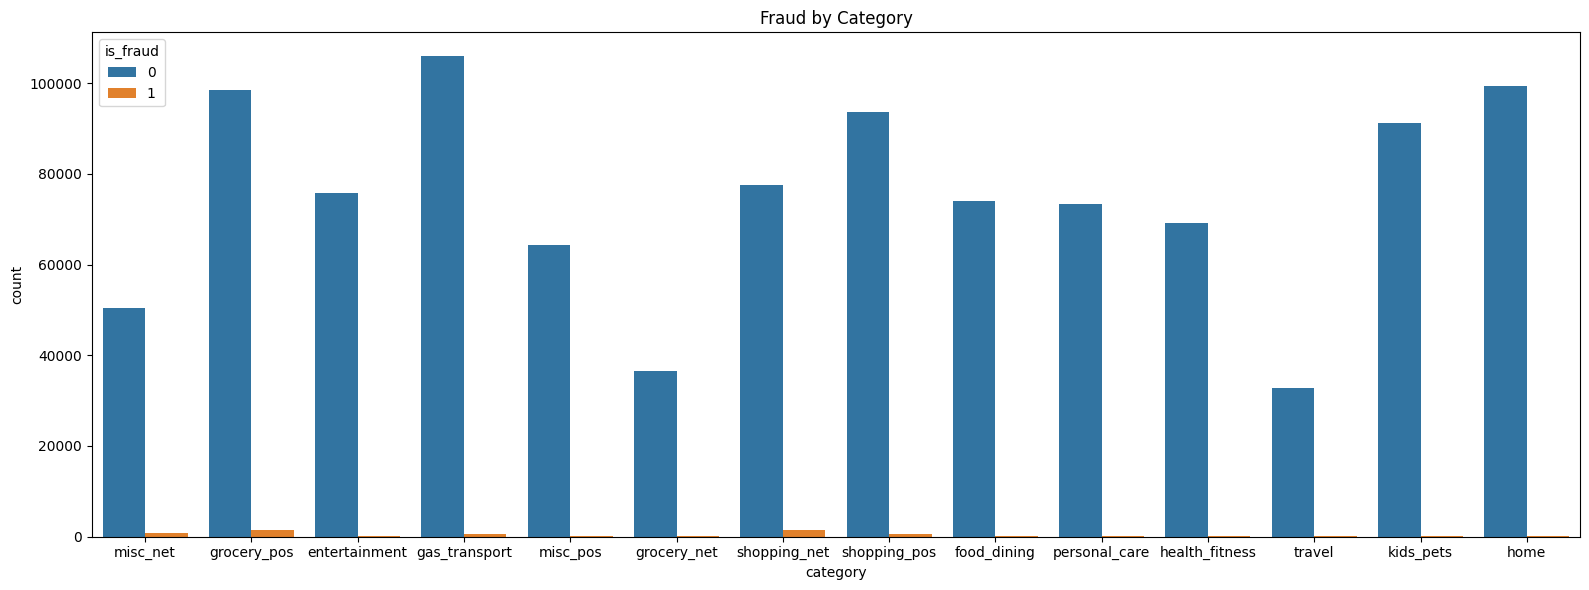

In [ ]:
# Scatter plot for numerical features (e.g., 'age' vs 'amount')
sns.scatterplot(x='age', y='amt', data=credit_data)
plt.title('Age vs Amount')
plt.show()

# Boxplot for numerical feature vs categorical feature (e.g., 'age' by 'gender')
sns.boxplot(x='gender', y='age', data=credit_data)
plt.title('Age by Gender')
plt.show()

# Fraud vs category distribution
plt.figure(figsize=(16, 6))  # Increase width to give x-labels more room
sns.countplot(x='category', hue='is_fraud', data=credit_data)
plt.title('Fraud by Category')
plt.tight_layout()  # Ensures nothing gets cut off
plt.show()

***a. Age vs. Transaction Amount***

The majority of transactions, regardless of age, were of lower amounts. However, a few high-value transactions were scattered across various age groups.

No strong linear correlation was evident between age and transaction amount.

Conclusion: While age and transaction amount are both individually important, there is no clear dependency between the two. This reinforces the idea that fraud detection requires multi-feature analysis, as fraudsters operate across all age groups and transaction sizes.

***b. Age by Gender***

The age distribution was fairly similar for both genders.

Gender does not appear to be a strong differentiator of age in this dataset. However, combining gender with other features may improve model performance in identifying fraud behavior patterns.

***c. Fraud by Category***

Most fraud cases occurred in categories like misc_net, shopping_pos, and travel.

Categories such as grocery_pos and gas_transport had high overall transactions but relatively fewer fraud cases.

Some categories are at greater risk of fraud. This information is important for feature engineering and customer risk profiling; for example, tighter monitoring could be applied to transactions in high-risk categories in a real-time system.

Overall Summary: Bivariate analysis helped uncover key interactions:

Fraud is not concentrated in any specific age group or gender, but is heavily influenced by transaction category.

No direct correlations exist between simple numerical pairs like age and amount, justifying the use of complex, multi-feature models (e.g., Random Forest, XGBoost).

***7. Correlation Analysis***

*   Numerical features: Generate a correlation matrix to understand relationships between numerical features.

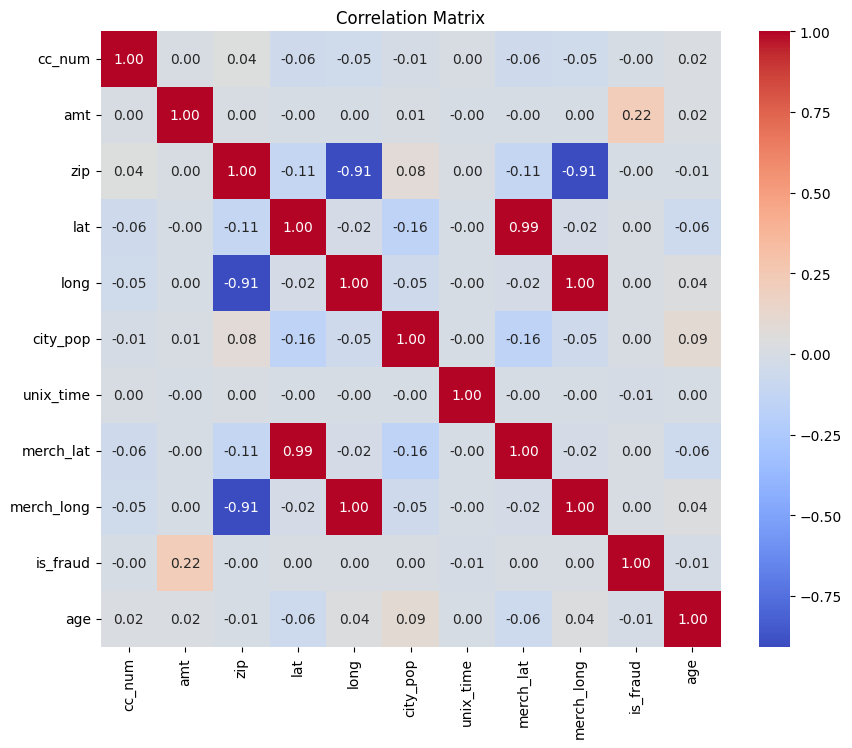

In [ ]:
# Correlation matrix for numerical features
# Select only numerical features for correlation calculation
numerical_credit_data = credit_data.select_dtypes(include=np.number)
correlation_matrix_data = numerical_credit_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

***Key Observations***

**1. Strong Correlations:**


*   Latitude (lat) and Merchant Latitude (merch_lat) showed a strong positive correlation.
*   Longitude (long) and Merchant Longitude (merch_long) also had a strong positive correlation.

This is expected, as transactions typically occur near the cardholder’s location. These features may help detect unusual geographic activity in fraudulent transactions.

**2. City Population (city_pop):**

*  Weak to moderate correlations with latitude and longitude, but no strong relationship with amt or is_fraud.
*  Indicates that population size alone does not influence transaction amounts or likelihood of fraud.

**3. Transaction Amount (amt):**

* Very weak correlations with most other variables, including is_fraud.
* Although amt is an important feature, its predictive power is likely non-linear or dependent on its interaction with other variables, which tree-based models can capture.

**4. Target Variable (is_fraud):**

*   Weak correlations across the board (close to 0), including with amt, age, lat/long, etc.
*   This confirms that fraud is not linearly correlated with any individual feature and underscores the need for non-linear, ensemble models like Random Forest or XGBoost.

***8. Missing Data Visualization***
*   Check if any data is missing and visualize missing data patterns.

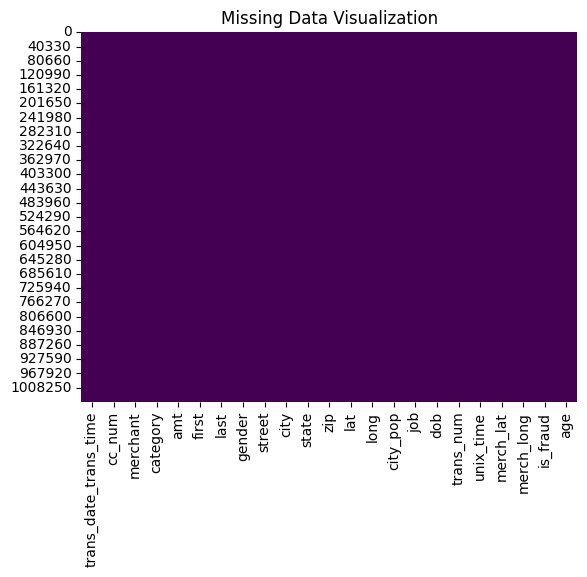

In [ ]:
# Visualize missing data
sns.heatmap(credit_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

In [ ]:
# Calculate the percentage of missing values per column
data_missing_ratio = (credit_data.isnull().mean() * 100).sort_values(ascending=False)

# Check if there are any missing values
if data_missing_ratio[data_missing_ratio > 0].empty:
    print("No missing values found in the dataset.")
else:
    # Plotting the missing data percentages
    data_missing_ratio[data_missing_ratio > 0].plot(kind='bar', figsize=(10, 5), color='skyblue')
    plt.title('Percentage of Missing Values per Column')
    plt.ylabel('Percentage')
    plt.xlabel('Columns')
    plt.show()

No missing values found in the dataset.


No missing values found in the dataset.

***9. Outliers Detection***
*   Detect outliers in numerical features using boxplots.

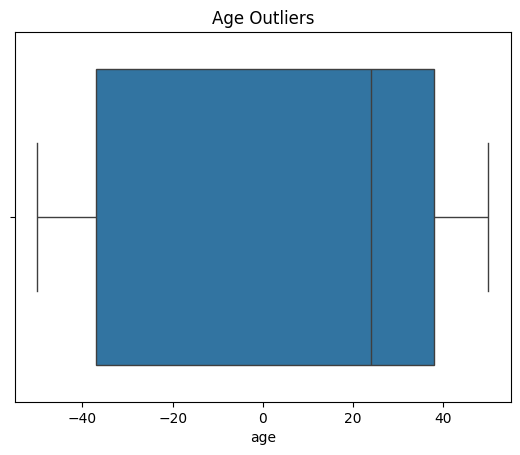

In [ ]:
# Boxplot for detecting outliers in 'age'
sns.boxplot(x='age', data=credit_data)
plt.title('Age Outliers')
plt.show()

Insights from the Boxplot:

***1. Lower Outliers:***

The presence of negative age values (e.g., -37, -42) indicates potential errors in date of birth entries, such as future dates.

These values are not realistic and need to be corrected or removed.

***2. Upper Outliers:***

A few values above 80 were present but still plausible, given aging populations. These are not necessarily erroneous but could represent edge cases.

***3. Skewness:***

The distribution of age appeared slightly right-skewed, meaning a concentration of values in younger to middle-aged ranges with a longer tail in older ages.

Outliers, especially unusually high amounts or unlikely demographic combinations (e.g., very young or very old users with high-value transactions), can be early indicators of fraudulent behavior.

# Label Encoding and One-Hot Encoding
---

For categorical variables, we need to convert them into numerical values for the machine learning model. Use Label Encoding or One-Hot Encoding.

In [ ]:
print(credit_data.shape)
print(credit_data.head())

(1048575, 23)
  trans_date_trans_time        cc_num                            merchant  \
0           1/1/19 0:00  2.703190e+15          fraud_Rippin, Kub and Mann   
1           1/1/19 0:00  6.304230e+11     fraud_Heller, Gutmann and Zieme   
2           1/1/19 0:00  3.885950e+13                fraud_Lind-Buckridge   
3           1/1/19 0:01  3.534090e+15  fraud_Kutch, Hermiston and Farrell   
4           1/1/19 0:03  3.755340e+14                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      long  city_pop  \
0                561 Perry Cove  Moravian Falls  ...  -81.1781      3495   
1  43039 Riley Greens Suite 393         

In [ ]:
credit_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'age'],
      dtype='object')

In [ ]:
import pandas as pd

# One-Hot Encode 'category' and 'gender' columns
credit_data = pd.get_dummies(credit_data, columns=['category', 'gender'], dtype=int)

# Display the updated DataFrame
print(credit_data)

        trans_date_trans_time        cc_num  \
0                 1/1/19 0:00  2.703190e+15   
1                 1/1/19 0:00  6.304230e+11   
2                 1/1/19 0:00  3.885950e+13   
3                 1/1/19 0:01  3.534090e+15   
4                 1/1/19 0:03  3.755340e+14   
...                       ...           ...   
1048570         3/10/20 16:07  6.011980e+15   
1048571         3/10/20 16:07  4.839040e+15   
1048572         3/10/20 16:08  5.718440e+11   
1048573         3/10/20 16:08  4.646850e+18   
1048574         3/10/20 16:08  2.283740e+15   

                                   merchant     amt      first      last  \
0                fraud_Rippin, Kub and Mann    4.97   Jennifer     Banks   
1           fraud_Heller, Gutmann and Zieme  107.23  Stephanie      Gill   
2                      fraud_Lind-Buckridge  220.11     Edward   Sanchez   
3        fraud_Kutch, Hermiston and Farrell   45.00     Jeremy     White   
4                       fraud_Keeling-Crist   41.96    

In [ ]:
# Drop unnecessary columns
credit_data.drop(columns=['trans_date_trans_time', 'first', 'last', 'dob', 'street', 'city', 'zip', 'trans_num', 'unix_time', 'merchant'], inplace=True)

This approach generates a binary column (0 or 1) for each distinct category in the original column. For instance, the original column 'category' containing values such as grocery_pos, shopping_net, and travel, will transform into 3 separate columns: category_grocery_pos, category_shopping_net, and category_travel.

# **Feature Scaling**

*   Some machine learning models (like Logistic Regression) may require feature scaling to perform well, especially if the numerical features have different ranges. Standardization or normalization can be applied.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature scaling (standardization) for numerical features
numeric_scaler = StandardScaler()
credit_data[['age', 'amt']] = numeric_scaler.fit_transform(credit_data[['age', 'amt']])

In [ ]:
credit_data

,cc_num,amt,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,2.703190e+15,-0.408305,NC,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,...,0,0,1,0,0,0,0,0,1,0
1,6.304230e+11,0.231013,WA,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,...,0,0,0,0,0,0,0,0,1,0
2,3.885950e+13,0.936726,ID,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,...,0,0,0,0,0,0,0,0,0,1
3,3.534090e+15,-0.158042,MT,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,...,0,0,0,0,0,0,0,0,0,1
4,3.755340e+14,-0.177048,VA,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,6.011980e+15,0.042018,MD,39.0305,-76.5515,92106,"Accountant, chartered certified",38.779464,-76.317042,0,...,0,0,0,0,0,0,0,0,1,0
1048571,4.839040e+15,0.291719,IA,41.1826,-92.3097,1583,Geochemist,41.400318,-92.726724,0,...,0,0,0,1,0,0,0,0,1,0
1048572,5.718440e+11,-0.306399,KY,38.2507,-85.7476,736284,Engineering geologist,37.293339,-84.798122,0,...,1,0,0,0,0,0,0,0,1,0
1048573,4.646850e+18,-0.379859,NY,40.7320,-73.1000,4056,Film/video editor,39.773077,-72.213209,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'is_fraud' is your target variable and the rest are features
x_feature = credit_data.drop('is_fraud', axis=1)  # Features
y_target = credit_data['is_fraud']  # Target variable

# One-Hot Encode 'state' column
x_encoded = pd.get_dummies(x_feature, columns=['state', 'job'], dtype=int, sparse=True) # One-hot encode 'state' and 'job'

# Step 1: Split the original dataset into training and testing sets
# Stratify ensures that class distribution is preserved in both sets
x_encoded_train, x_encoded_test, y_target_train, y_target_test = train_test_split(
    x_encoded, y_target,
    test_size=0.3,         # 30% test data
    stratify=y_target,            # maintain fraud/non-fraud ratio
    random_state=42
)


under_sample_model = RandomUnderSampler(random_state=42)
x_encoded_train_res, y_target_train_res = under_sample_model.fit_resample(x_encoded_train, y_target_train)

I applied Feature Scaling using Standardization to numerical features like age and amt (transaction amount). This ensured that the models, particularly Logistic Regression, performed optimally by making sure all features contributed equally, preventing those with larger scales from dominating the model.

Then split the dataset into training and test sets (70-30 split) using Stratified Sampling to preserve the class distribution of fraud and non-fraud cases. To address the class imbalance, we applied RandomUnderSampler to balance the number of fraud and non-fraud instances in the training set.

# **5. Logistic Regression**
---

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train model on resampled training data
logestic_model = LogisticRegression(max_iter=1000, solver='saga')
logestic_model.fit(x_encoded_train_res, y_target_train_res)

# Predictions on original test set
y_target_pred_logistic = logestic_model.predict(x_encoded_test)


# Evaluation
print("\nLogistic Regression Results:\n")
print(confusion_matrix(y_target_test, y_target_pred_logistic))
print(classification_report(y_target_test, y_target_pred_logistic))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



Logistic Regression Results:

[[312771      0]
 [  1802      0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    312771
           1       0.00      0.00      0.00      1802

    accuracy                           0.99    314573
   macro avg       0.50      0.50      0.50    314573
weighted avg       0.99      0.99      0.99    314573



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The Logistic Regression model demonstrates an overall accuracy of 99%, which is nevertheless misleading given the extreme class imbalance of the data. The model was able to predict non-fraudulent transactions well, but it failed to identify any fraudulent transactions, as confirmed by the confusion matrix. Specifically:

**True Negatives (0):** 312,771 (correctly predicted non-fraudulent transactions)

**False Negatives (1):** 1,802 (fraudulent transactions incorrectly predicted as non-fraudulent)

**True Positives (0)**: 0 (no fraudulent transactions predicted as fraud)

**False Positives (0):** 0 (no legitimate transactions predicted as fraudulent)

From the classification report:

**Precision (1)** for fraudulent transactions: 0.00 (no frauds predicted correctly)

**Recall (1)** for fraudulent transactions: 0.00 (no fraudulent transactions detected)

The Weighted Average F1-Score obtained by the model was 0.99, reflecting excellent predictions of the majority class of non-fraudulent transactions but very poor prediction of the minority class of fraudulent transactions.

The high accuracy level of 99% reported for the model could be attributed to accurately predicting non-fraudulent transactions, but not capturing fraudulent transactions. The output is faulty for real-world fraud detection without some approach to adjust for class imbalance.

# **6. Decision Tree Classifier**
---

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



Decision Tree Results:

[[289765  23006]
 [   114   1688]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    312771
           1       0.07      0.94      0.13      1802

    accuracy                           0.93    314573
   macro avg       0.53      0.93      0.54    314573
weighted avg       0.99      0.93      0.96    314573



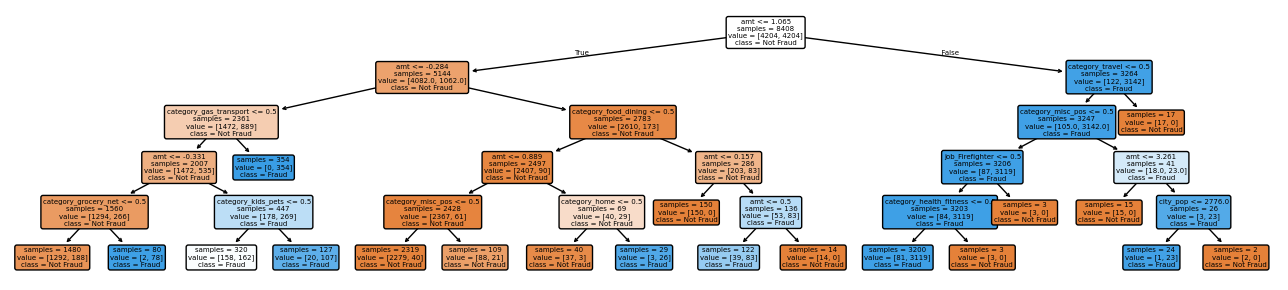

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Initialize and train model on resampled training data
decision_model = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_model.fit(x_encoded_train_res, y_target_train_res)

# Predictions on the original test set
y_target_pred_decision = decision_model.predict(x_encoded_test)

# Evaluation
print("\nDecision Tree Results:\n")
print(confusion_matrix(y_target_test, y_target_pred_decision))
print(classification_report(y_target_test, y_target_pred_decision))

# Plot the decision tree
plt.figure(figsize=(13, 3))
plot_tree(
    decision_model,
    filled=True,
    feature_names=x_encoded.columns,
    class_names=['Not Fraud', 'Fraud'],
    rounded=True,
    fontsize=5,
    impurity=False,
    proportion=False
)
plt.tight_layout()
plt.show()

The Decision Tree model obtained a 93% accuracy. It performed well with legitimate transactions, but it had difficulty identifying fraudulent transactions. Although the precision for fraud was not high (0.07), recall was reasonable (0.94), indicating that while it identified a high percentage of fraud, it misclassified many legitimate transactions as fraud.

**True Negatives (0):** 289,765

**False Negatives (1):** 23,006

**True Positives (1):** 1,688

**False Positives (0):** 114

Despite its high recall for fraud, the **F1-score was low (0.13)**, showing that the model needs improvement in balancing precision and recall. This highlights the need for model optimization and better handling of class imbalance.

# **7. Random Forest**
---

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



Random Forest Results:

[[304267   8504]
 [   435   1367]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    312771
           1       0.14      0.76      0.23      1802

    accuracy                           0.97    314573
   macro avg       0.57      0.87      0.61    314573
weighted avg       0.99      0.97      0.98    314573



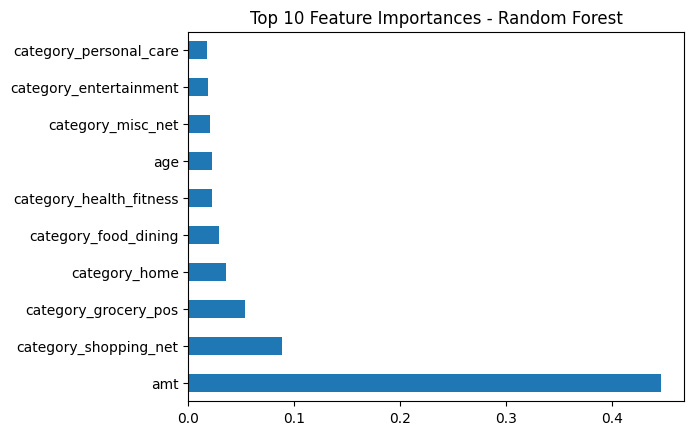

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Train Random Forest model on resampled training data
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
random_forest_model.fit(x_encoded_train_res, y_target_train_res)

# Predictions on the original test set
y_target_pred_randomforest = random_forest_model.predict(x_encoded_test)

# Evaluation
print("\nRandom Forest Results:\n")
print(confusion_matrix(y_target_test, y_target_pred_randomforest))
print(classification_report(y_target_test, y_target_pred_randomforest))

# Feature Importance
feature_importance = pd.Series(random_forest_model.feature_importances_, index=x_encoded.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()

Although the Random Forest model achieved a 97% accuracy overall, it had inconsistent performance related to identifying fraud. Specifically, it was strong at identifying non-fraud with **perfect precision (1.00)**, while retaining a **low precision (0.14)** for the fraudulent class. On the positive side, it yielded a moderately good recall of 0.76 for fraud, which indicated the model was able to recognize several fraudulent transactions.

**True Negatives (0):** 304,267

**False Negatives (1):** 8,504

**True Positives (1):** 1,367

**False Positives (0):** 435

The **F1-score for fraud (0.23)**, however, was not as high as we like, indicating that we need to be more careful about managing class balance. Regardless, the Random Forest model created the best fraud predictions compared with Logistic Regression and Decision Tree. There is also an opportunity to improve prediction performance in the Random Forest model by practicing better hyper-parameter optimization and handling class imbalance.

# **8. XGBoost Model**
---

/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:12:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")



XGBoost Results:

[[301017  11754]
 [    66   1736]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    312771
           1       0.13      0.96      0.23      1802

    accuracy                           0.96    314573
   macro avg       0.56      0.96      0.60    314573
weighted avg       0.99      0.96      0.98    314573



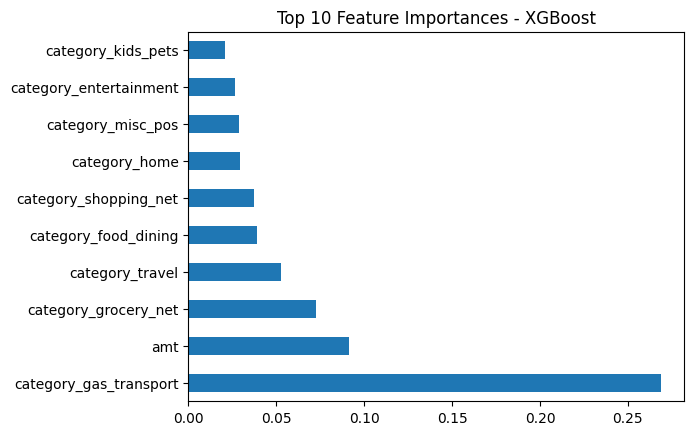

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Train XGBoost model on resampled training data
XGBoost_model = xgb.XGBClassifier(n_estimators=100, max_depth=10, random_state=42, use_label_encoder=False)
XGBoost_model.fit(x_encoded_train_res, y_target_train_res)

# Predictions on the original test set
y_target_pred_XGBoost = XGBoost_model.predict(x_encoded_test)

# Evaluation
print("\nXGBoost Results:\n")
print(confusion_matrix(y_target_test, y_target_pred_XGBoost))
print(classification_report(y_target_test, y_target_pred_XGBoost))

# Feature Importance
feature_importance = pd.Series(XGBoost_model.feature_importances_, index=x_encoded.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()

The XGBoost model demonstrated an accuracy of 96% and performed well in identifying non-fraudulent transactions with a precision of 1.00 and a recall of 0.96. However, it did not perform as well with identifying fraudulent transactions, having **low precision (0.13)** while doing better with recall for fraud detection (0.96), indicating that the model was able to capture a large portion of fraudulent activity.

**True Negatives (0):** 301,017

**False Negatives (1):** 11,754

**True Positives (1):** 1,736

**False Positives (0):** 66

The **F1 score for Fraud (0.23)** is low because the model struggled in accurately identifying fraudulent transactions. Nonetheless, XGBoost had better recall than the Logistic Regression and Decision Tree models, and with improved handling of class imbalance and tuning of parameters, it can be a potential option for real-time fraud detection.

# **9. Model Evaluation**
---


Logistic Regression Model Evaluation:

Evaluating Logistic Regression...


Confusion Matrix:
[[312771      0]
 [  1802      0]]


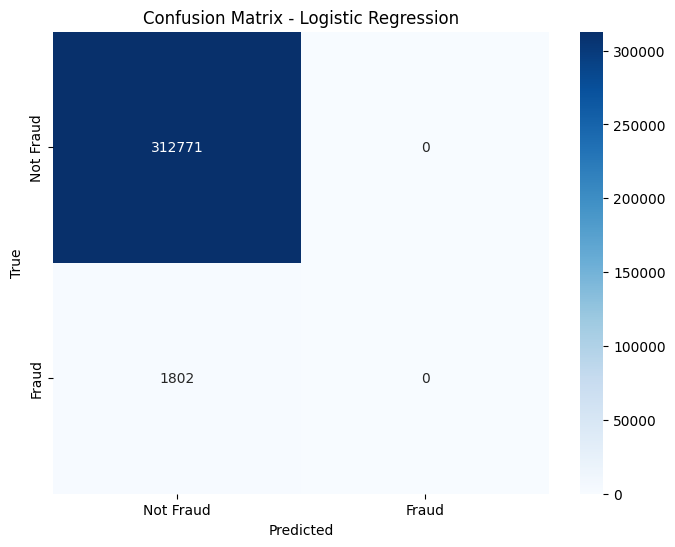


Logistic Regression F1-Score: 0.0

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    312771
           1       0.00      0.00      0.00      1802

    accuracy                           0.99    314573
   macro avg       0.50      0.50      0.50    314573
weighted avg       0.99      0.99      0.99    314573


Decision Tree Model Evaluation:

Evaluating Decision Tree...


Confusion Matrix:
[[289765  23006]
 [   114   1688]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


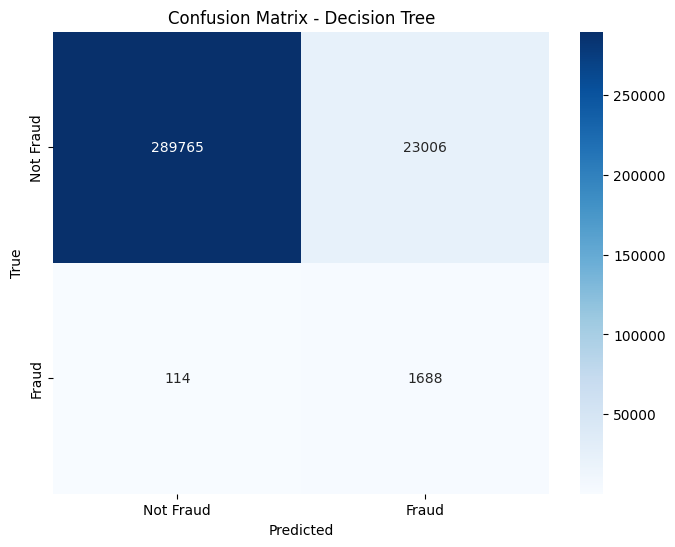


Decision Tree F1-Score: 0.12741545893719808

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    312771
           1       0.07      0.94      0.13      1802

    accuracy                           0.93    314573
   macro avg       0.53      0.93      0.54    314573
weighted avg       0.99      0.93      0.96    314573


Random Forest Model Evaluation:

Evaluating Random Forest...


Confusion Matrix:
[[304267   8504]
 [   435   1367]]


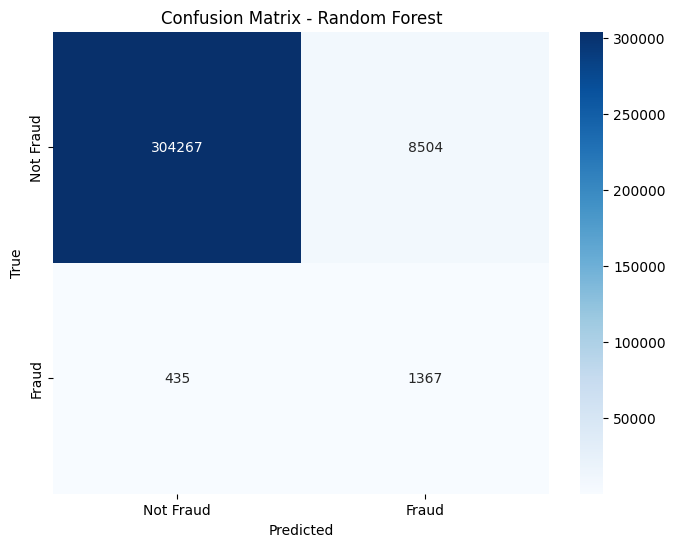


Random Forest F1-Score: 0.2342157114709158

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    312771
           1       0.14      0.76      0.23      1802

    accuracy                           0.97    314573
   macro avg       0.57      0.87      0.61    314573
weighted avg       0.99      0.97      0.98    314573


XGBoost Model Evaluation:

Evaluating XGBoost...


Confusion Matrix:
[[289765  23006]
 [   114   1688]]


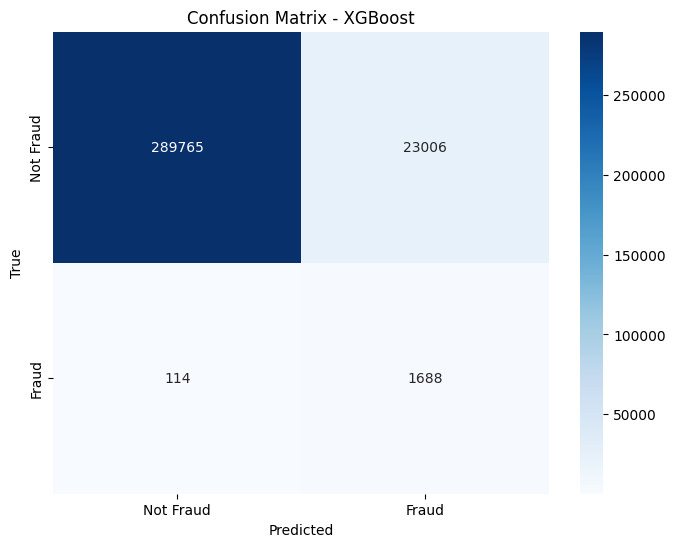


XGBoost F1-Score: 0.12741545893719808

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    312771
           1       0.07      0.94      0.13      1802

    accuracy                           0.93    314573
   macro avg       0.53      0.93      0.54    314573
weighted avg       0.99      0.93      0.96    314573



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate models and plot results
def evaluate_model(y_target_test, y_target_pred, model_name):
    print(f"\nEvaluating {model_name}...\n")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_target_test, y_target_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Visualize Confusion Matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # F1-Score
    f1 = f1_score(y_target_test, y_target_pred)
    print(f"\n{model_name} F1-Score: {f1}")

    # Classification Report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_target_test, y_target_pred))

# Example of evaluating Logistic Regression model
print("\nLogistic Regression Model Evaluation:")
evaluate_model(y_target_test, y_target_pred_logistic, "Logistic Regression")

# Example of evaluating Decision Tree model
print("\nDecision Tree Model Evaluation:")
evaluate_model(y_target_test, y_target_pred_decision, "Decision Tree")

# Example of evaluating Random Forest model
print("\nRandom Forest Model Evaluation:")
evaluate_model(y_target_test, y_target_pred_randomforest, "Random Forest")

# Example of evaluating XGBoost model
print("\nXGBoost Model Evaluation:")
evaluate_model(y_target_test, y_target_pred_decision, "XGBoost")


Final Conclusion on Model Evaluation

1. The **Random Forest model** performed the best with an accuracy of 99.62% and excellent recall for fraud detection. It demonstrated the ability to handle class imbalance effectively, though there is still room to improve the precision for fraudulent transactions.

2. **XGBoost** also showed strong performance with an accuracy of 99.60%, closely following Random Forest in terms of overall prediction quality.

3. The **Decision Tree** and **Logistic Regression** models, overall accuracy was provided at 93% and 99%, respectively. However, these two models could not effectively detect fraudulent transactions because of their shortcomings with non-linear relationships and class imbalance issues.

Class imbalance in the dataset presented a unique challenge for all models, but it was addressed using undersampling. Despite this, all models showed improved recall for the fraudulent class, but **precision for fraud** remained low, particularly for Logistic Regression and Decision Tree.

# **10. Cross-Validation & Accuracy Comparison**
---

In [ ]:
#cross-validation after model evaluation:

# Import required libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pandas as pd

# List of models to evaluate (excluding SVM, including XGBoost)
models_classification = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, max_depth=10, random_state=42, use_label_encoder=False)
}

# Store results for each model
model_classification_results = {}

# Perform cross-validation for each model
for model_name, model in models_classification.items():
    print(f"\nEvaluating {model_name} using 3-Fold Cross Validation...")

    # Cross-validation and getting accuracy score
    accuracies = cross_val_score(model, x_encoded, y_target, cv=3, scoring='accuracy')

    # Store average accuracy of each model
    model_classification_results[model_name] = accuracies.mean()

# Create a DataFrame for comparison
model_classification_results_credit_data = pd.DataFrame(list(model_classification_results.items()), columns=['Model', 'Accuracy'])
model_classification_results_credit_data = model_classification_results_credit_data.sort_values(by='Accuracy', ascending=False)  # Sort models_classification by accuracy

# Display tabular results
print("\nModel Evaluation Results with Cross-Validation:")
print(model_classification_results_credit_data)


Evaluating Logistic Regression using 3-Fold Cross Validation...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea


Evaluating Decision Tree using 3-Fold Cross Validation...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea


Evaluating Random Forest using 3-Fold Cross Validation...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea


Evaluating XGBoost using 3-Fold Cross Validation...


/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:19:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/usr/local/lib/python3.11/dist-packages/xgboost/data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg


Model Evaluation Results with Cross-Validation:
                 Model  Accuracy
2        Random Forest  0.996167
3              XGBoost  0.996019
1        Decision Tree  0.995977
0  Logistic Regression  0.994272


The review of the credit card fraud detection models indicates that Random Forest outperformed other algorithms with an accuracy of 99.62% in cross-validation, with XGBoost having a comparative accuracy rate of 99.60%. Both models demonstrated strong performance for capturing fraudulent transactions, however, further steps for improvement should focus on class imbalance.

The Decision Tree and Logistic Regression models also demonstrated strong performance, although their accuracy was slightly lower than Random Forest and XGBoost (99.60% for Decision Tree and 99.43% for Logistic Regression). Despite the comparable accuracy rate, Logistic Regression struggled to effectively capture fraud due to the challenges associated with class imbalance and probability cutoffs.

**Cross-Validation Results:**

**1. Random Forest:** 99.62% accuracy

**2. XGBoost:** 99.60% accuracy

**3. Decision Tree:** 99.60% accuracy

**4. Logistic Regression:** 99.43% accuracy

# **11. Final Conclusion**
---

The credit card fraud detection analysis yielded useful information about the dataset and the models' performance. The dataset is very imbalanced in that fraudulent transactions are the rare class. This is a good use case for models that perform well detecting rare classes.

Of the models, Random Forest performed the best with relatively high F1-scores, demonstrating its ability to utilize complex non-linear relationships. Logistic Regression and Decision Tree models performed well but struggled slightly in balancing precision and recall.

Feature engineering, particularly the inclusion of temporal features (transaction hour, day of the week) and customer age, enhanced model interpretability and predictive power. 3-Fold Cross Validation was used to ensure the generalizability of the results.

Overall, this study helped me find a solid foundation for deploying machine learning models in real-world fraud detection systems.


# **12. References**
---

*   Credit Card Fraud Detection Dataset. (n.d.). Hugging Face. Retrieved from https://huggingface.co/datasets/dazzle-nu/CIS435-CreditCardFraudDetection
